In [1]:
# IGNORE THIS CELL WHICH CUSTOMIZES LAYOUT AND STYLING OF THE NOTEBOOK !
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings = lambda *a, **kw: None
from IPython.core.display import HTML; HTML(open("custom.html", "r").read())

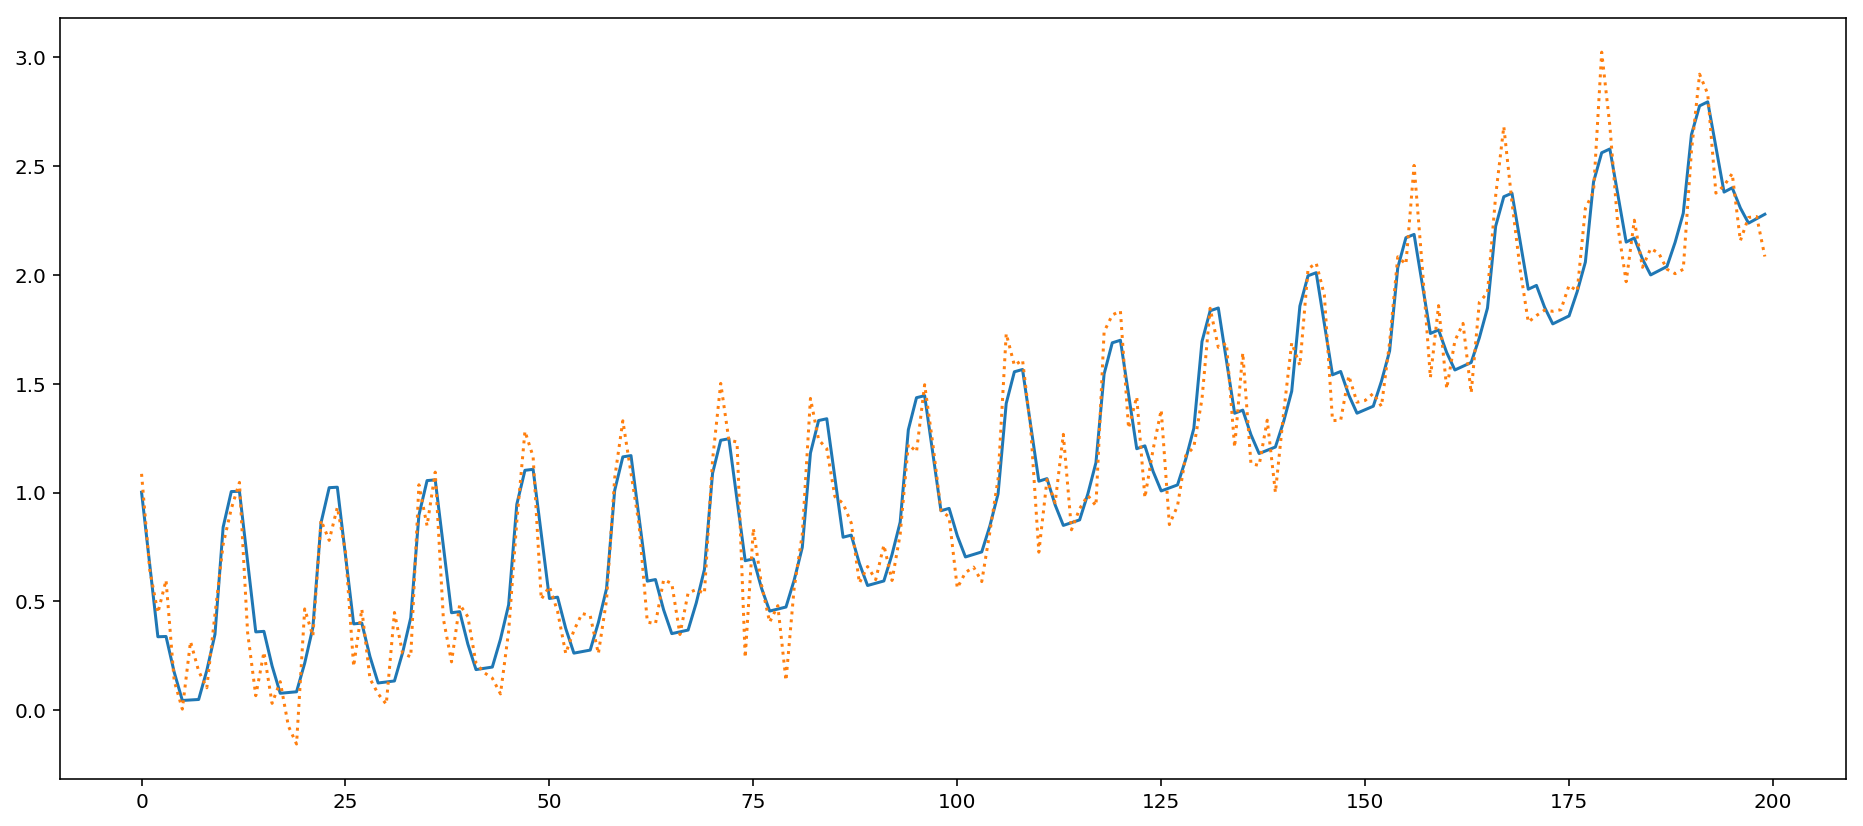

In [463]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

np.random.seed(42)

t = np.arange(200)

td = t * 36 / 200
trend = 0.1 * td + 0.015 * td * td - 0.000015 * (td - 10) ** 3
trend /= 10

months = [30, 20, 10, 10, 5, 1, 1, 1, 5, 10, 25, 30]

monthly = np.array([months[i % 12] * np.exp(-0.002 * i) for i in t]) / 30

plt.figure(figsize=(16, 7))
#plt.plot(t, trend);
plt.plot(t, trend + monthly);

y_true = trend + monthly 

y = y_true + .17 * np.random.randn(len(t))

plt.plot(t, y, ':');


import pandas as pd

df = pd.DataFrame(dict(month=t, sales=y))
df.to_csv("data/sales.csv", index=False)

In [437]:
win_size = 24

features = np.zeros((len(t) - win_size, win_size))

for i in range(len(t) - win_size):
    features[i] = y[i: i + win_size]

In [438]:
values = y[win_size:]

In [467]:
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import Lasso, Lars
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

In [474]:
if 1:
    

    p = KernelRidge(kernel="rbf")
    
    p = Lars()
    p = Lasso()
    param_grid = {'alpha': 10 ** np.linspace(-2, 2, 10)}
    # param_grid = {'eps': 10 ** np.linspace(-2, 2, 10)}

else:
    p = SVR()
    param_grid = {'C': 10 ** np.linspace(-4, 2, 20)}

search = GridSearchCV(p, param_grid, scoring="r2", cv=4)
#search = LinearRegression()
search.fit(features, values)
search.best_params_, search.best_score_

({'alpha': 0.01}, 0.7333925377892497)

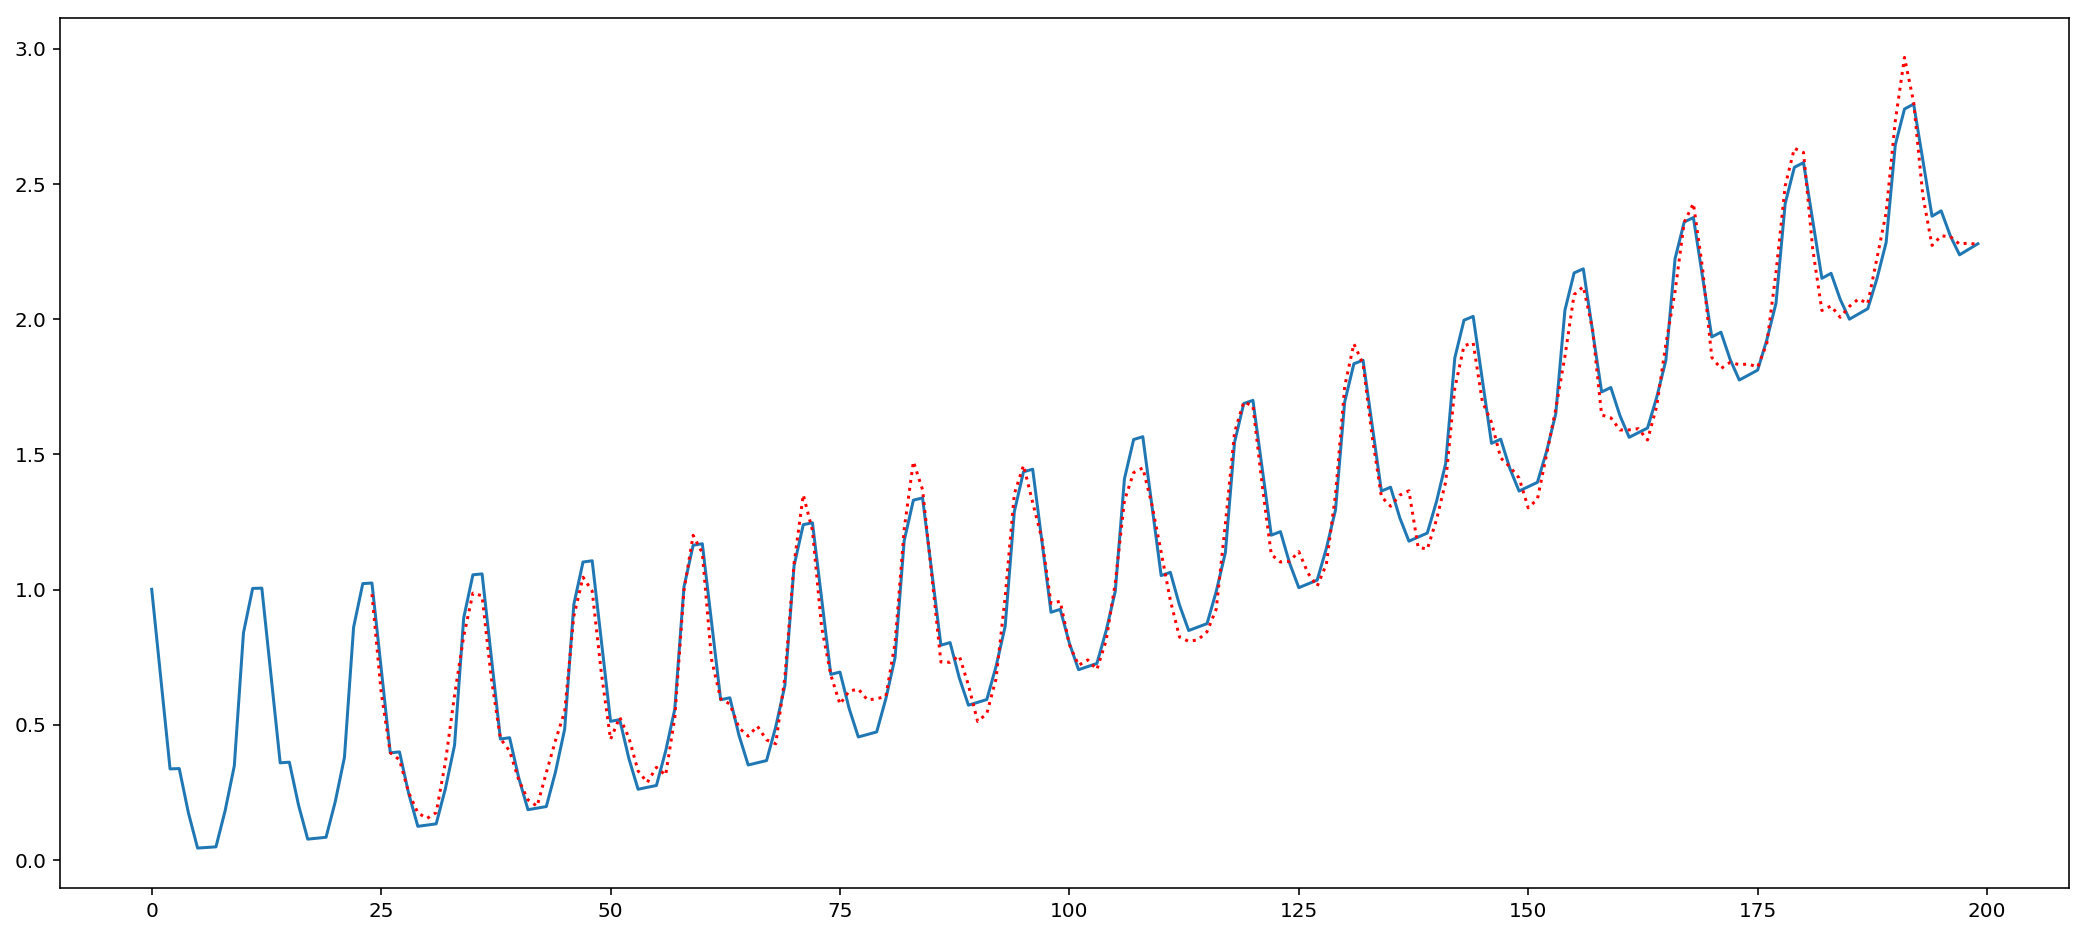

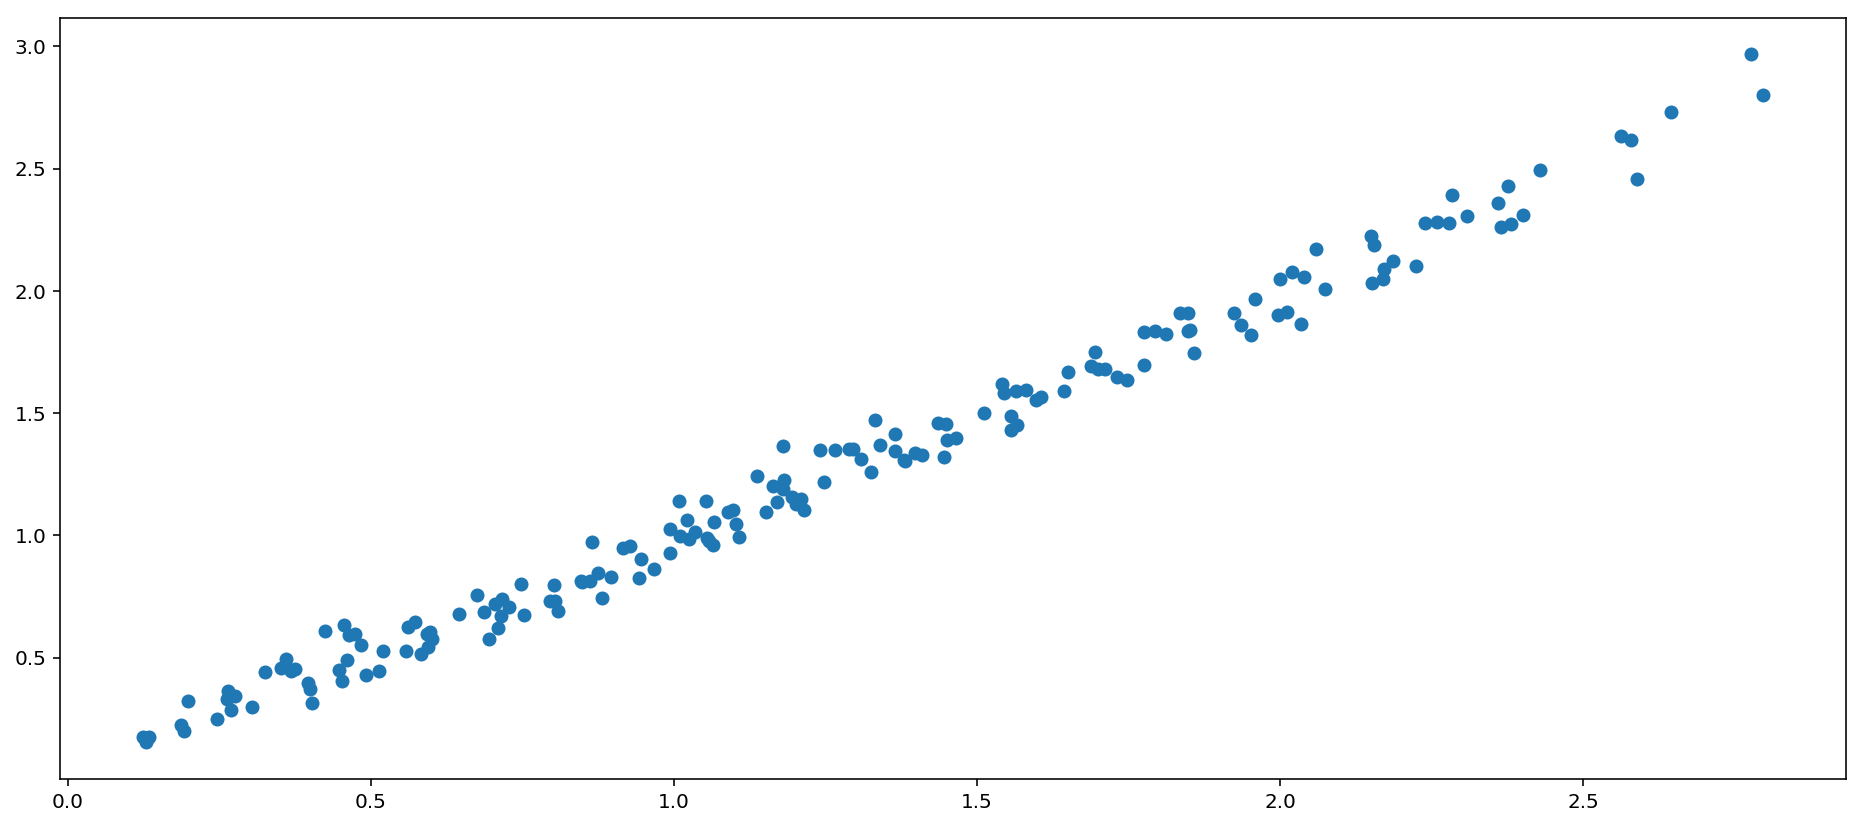

In [475]:
plt.figure(figsize=(18, 8))
plt.plot(t, y_true)
plt.plot(t[win_size:], search.predict(features), "r:");
# features[40]

plt.figure(figsize=(16, 7))
plt.scatter(y_true[win_size:], search.predict(features))


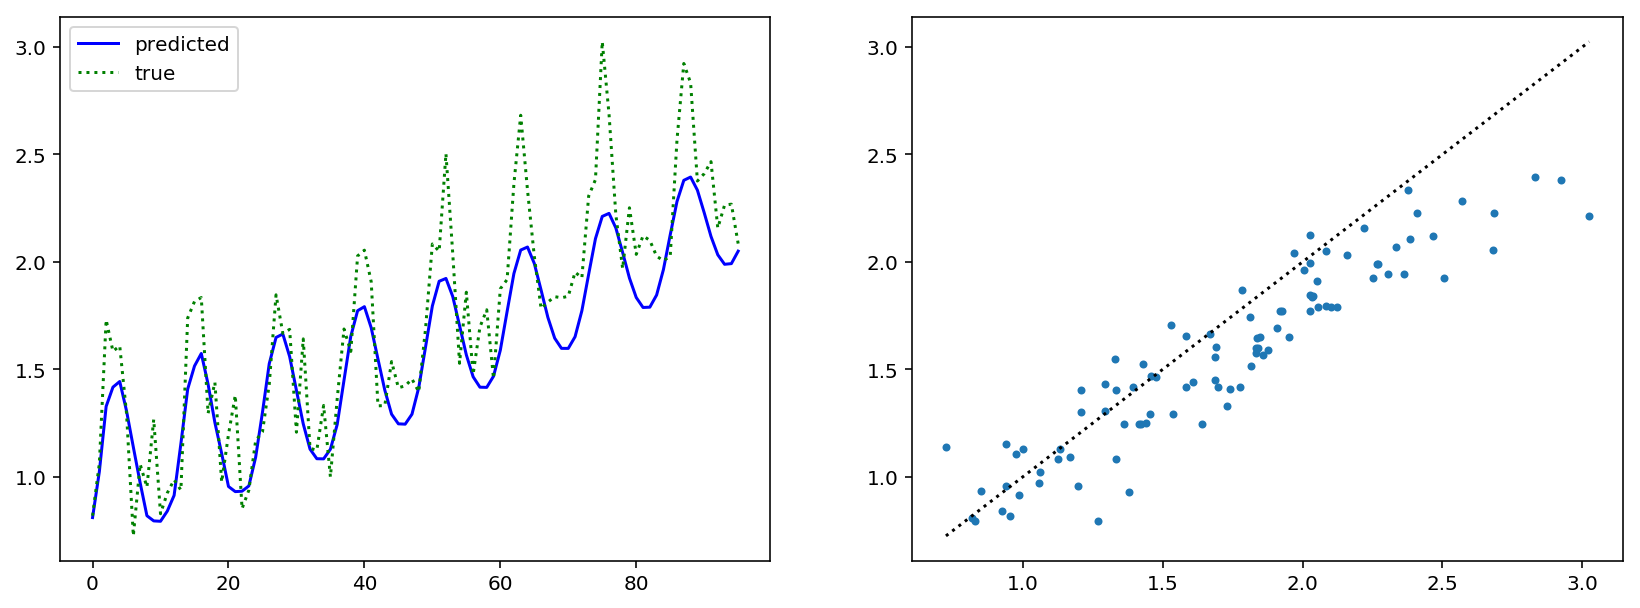

In [476]:
NLAST = 96
start = features[-NLAST, :].copy()
# print(features[40])
# print(start)

y_known = values[-NLAST:]
predicted = []

for k in range(NLAST):
    #print(k, start[None, :])
    new = search.predict(start[None, :])
    #print(new)
    predicted.append(new)
    start[:-1] = start[1:]
    start[-1] = new
    
    
predicted = np.array(predicted).flatten()
plt.figure(figsize=(14, 5))    
plt.subplot(1, 2, 1)    
plt.plot(predicted,'b', label='predicted')
plt.plot(y_known, "g:", label='true');
plt.legend();

plt.subplot(1, 2, 2)
plt.scatter(y_known, predicted, marker='.')

mi, ma = np.min(y_known), np.max(y_known)
plt.plot([mi, ma], [mi, ma], 'k:');

In [457]:
predicted = predicted - np.mean(predicted)
y_known = y_known - np.mean(y_known)
n1 = predicted @ y_known
d1 = (predicted @ predicted) ** .5
d2 = (y_known @ y_known) ** .5
r2 = n1 / (d1 * d2)
print("r2 is", r2)

r2 is 0.9619122726226003


In [369]:
n1

31.291862706257596